In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Getting the current working directory
current_working_directory = os.getcwd()

# Printing the current working directory
print("Current Working Directory:", current_working_directory)



Current Working Directory: /content


In [ ]:

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/FrameData_webrtc_results.csv'

df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame
print(df.head())

   Frame Count                Start Time End Time
0            0   2024-01-15 22:42:50.711      NaN
1            1   2024-01-15 22:42:50.711      NaN
2            2   2024-01-15 22:42:52.704      NaN
3            3   2024-01-15 22:42:52.787      NaN
4            4   2024-01-15 22:42:52.808      NaN


In [ ]:
print("Column Names:", df.columns)


Column Names: Index(['Frame Count', 'Start Time', 'End Time'], dtype='object')


In [ ]:
# Remove rows where 'End Time' is missing
df.dropna(subset=['End Time'], inplace=True)

# Check the result
print(df.head())

      Frame Count               Start Time                 End Time
941           941  2024-01-15 22:43:05.128  2024-01-15 22:43:05.196
944           944  2024-01-15 22:43:05.170  2024-01-15 22:43:05.229
954           954  2024-01-15 22:43:05.300  2024-01-15 22:43:05.363
964           964  2024-01-15 22:43:05.426  2024-01-15 22:43:05.497
1009         1009  2024-01-15 22:43:06.028  2024-01-15 22:43:06.096


In [ ]:

# Convert 'Start Time' and 'End Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Calculate latency in milliseconds and store in a new column
df['Latency'] = (df['End Time'] - df['Start Time']).dt.total_seconds()

# Display the DataFrame to verify the results
print(df.head())


      Frame Count              Start Time                End Time  Latency
941           941 2024-01-15 22:43:05.128 2024-01-15 22:43:05.196    0.068
944           944 2024-01-15 22:43:05.170 2024-01-15 22:43:05.229    0.059
954           954 2024-01-15 22:43:05.300 2024-01-15 22:43:05.363    0.063
964           964 2024-01-15 22:43:05.426 2024-01-15 22:43:05.497    0.071
1009         1009 2024-01-15 22:43:06.028 2024-01-15 22:43:06.096    0.068


In [ ]:
print(df)

      Frame Count              Start Time                End Time  Latency
941           941 2024-01-15 22:43:05.128 2024-01-15 22:43:05.196    0.068
944           944 2024-01-15 22:43:05.170 2024-01-15 22:43:05.229    0.059
954           954 2024-01-15 22:43:05.300 2024-01-15 22:43:05.363    0.063
964           964 2024-01-15 22:43:05.426 2024-01-15 22:43:05.497    0.071
1009         1009 2024-01-15 22:43:06.028 2024-01-15 22:43:06.096    0.068
1066         1066 2024-01-15 22:43:06.832 2024-01-15 22:43:06.901    0.069
1075         1075 2024-01-15 22:43:06.962 2024-01-15 22:43:07.011    0.049
1091         1091 2024-01-15 22:43:07.200 2024-01-15 22:43:07.244    0.044
1112         1112 2024-01-15 22:43:07.521 2024-01-15 22:43:07.578    0.057
1134         1134 2024-01-15 22:43:07.836 2024-01-15 22:43:07.928    0.092
1169         1169 2024-01-15 22:43:08.366 2024-01-15 22:43:08.427    0.061
1195         1195 2024-01-15 22:43:08.798 2024-01-15 22:43:08.860    0.062
1213         1213 2024-01

In [ ]:
average_latency = df['Latency'].mean()


NameError: name 'df' is not defined

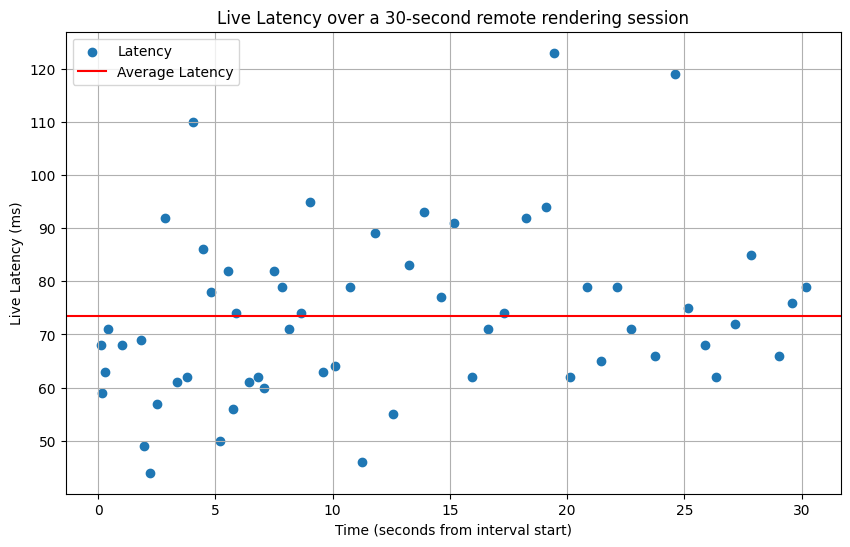

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Time'], df['Latency'], marker='o', label='Latency')
plt.axhline(y=average_latency, color='r', linestyle='-', label='Average Latency')
plt.xlabel('Time (seconds from interval start)')
plt.ylabel('Live Latency (ms)')
plt.title('Live Latency over a 30-second remote rendering session')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Calculate median and 0.75 quantile for Latency to provide insights into the distribution of latency values
median_latency = df['Latency'].median()
quantile_75_latency = df['Latency'].quantile(0.75)

print("Median Latency (ms):", median_latency)
print("0.75 Quantile of Latency (ms):", quantile_75_latency)


Median Latency (ms): 71.0
0.75 Quantile of Latency (ms): 81.25


In [ ]:
df['Latency'].describe()

count     58.000000
mean      73.500000
std       16.093204
min       44.000000
25%       62.000000
50%       71.000000
75%       81.250000
max      123.000000
Name: Latency, dtype: float64

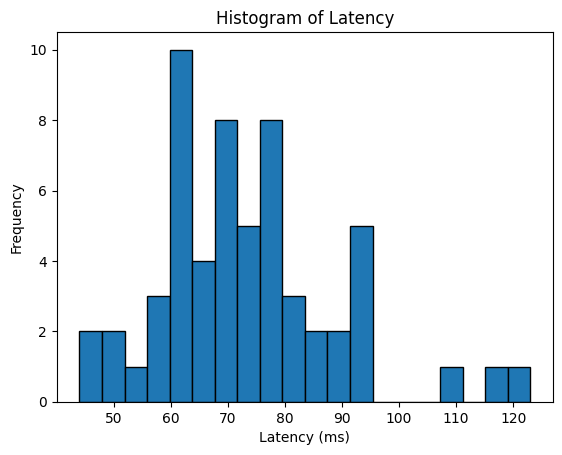

In [ ]:
plt.hist(df['Latency'], bins=20, edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency')
plt.show()

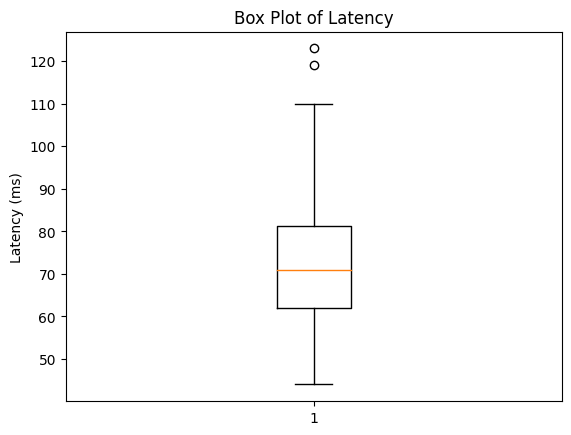

In [ ]:
plt.boxplot(df['Latency'])
plt.ylabel('Latency (ms)')
plt.title('Box Plot of Latency')
plt.show()